In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.metrics import classification_report

In [127]:
data=loadmat('./ex3data1.mat')

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [99]:
data['X'][4555,:]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.22549020e-04, -5.12616689e-04, -1.26862064e-02, -6.16166258e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [4]:
data['X'].shape

(5000, 400)

#相当于输入特征是400个

In [5]:
data['y'].shape

(5000, 1)

In [6]:
df=pd.DataFrame(data['y'])

In [7]:
data['y']

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [8]:
test=np.matrix(data['y'])

In [9]:
test.shape

(5000, 1)

#加油时间不会负你

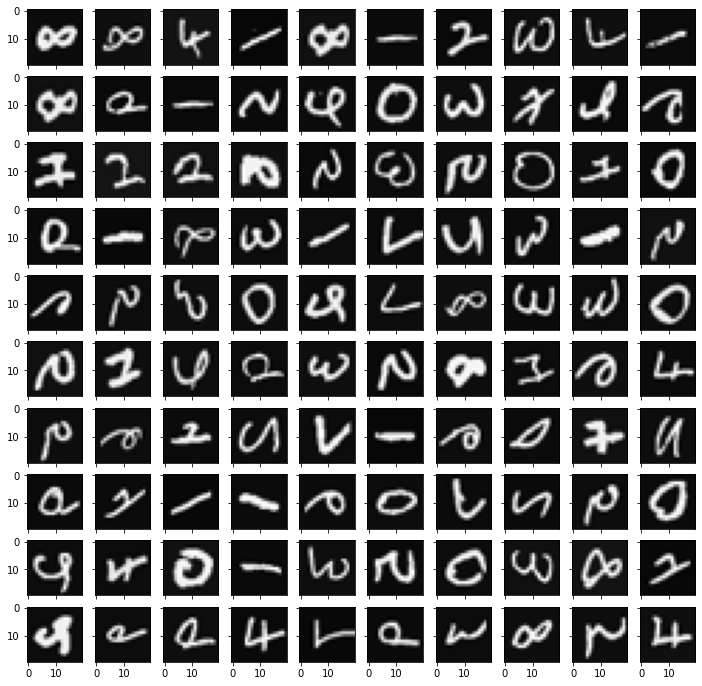

In [10]:
fig,axes=plt.subplots(10,10,sharey=True,sharex=True,figsize=(12,12))
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(data['X'][np.random.randint(0,4999),:].reshape((20,20)),cmap='gray')

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [11]:
def cost(theta,X,Y,lr):
    theta=np.matrix(theta)
    X=np.matrix(X)
    Y=np.matrix(Y)#如函数转置好习惯
    L=Y.shape[0]
    cost1=np.multiply(-Y,np.log(sigmoid(np.matmul(X,theta.T))))
    cost2=np.multiply((1-Y),np.log(1-sigmoid(np.matmul(X,theta.T))))
    reg=(lr/(2*L))*np.sum(np.power(theta[:,1:theta.shape[1]],2))
    return (np.sum(cost1-cost2))/L+reg

In [13]:
def gradient(theta,X,Y,lr):
    theta=np.matrix(theta)
    X=np.matrix(X)
    Y=np.matrix(Y)
    L=Y.shape[0]
    regf=(lr/L)*theta
    faults=sigmoid(np.matmul(X,theta.T))-Y#是这里出了问题faults是预测减去实际！！！
    grad=((np.matmul((X.T),faults))/L).T+(regf)
    grad[0,0]=np.sum(np.multiply(faults,X[:,0]))/L#单独算出那个常数项的梯度
    return np.array(grad).ravel()#用ravel()方法将数组a拉成一维数组

In [14]:
from scipy.optimize import minimize
def O_VS_ALL(X,Y,lr):
    r=X.shape[0]
    features=X.shape[1]+1
    all_theta=np.zeros((10,features))
    X=np.insert(X,0,values=np.ones(r),axis=1)
    for i in range(1,11):#这里无非是进行了十次逻辑回归
        theta=np.zeros(features)
        Y_i=np.array([1 if label==i else 0 for label in Y])
        Y_i=np.reshape(Y_i,(r,1))
        fmin=minimize(fun=cost,x0=theta,args=(X,Y_i,lr),method='TNC',jac=gradient)
        print(fmin)
        all_theta[i-1,:]=fmin.x
    return all_theta

In [16]:
test.shape

(5000, 1)

In [17]:
all_theta = O_VS_ALL(data['X'],data['y'],1)

     fun: 0.026960078767975203
     jac: array([ 3.78917484e-07,  0.00000000e+00,  0.00000000e+00,  2.12431526e-12,
       -1.96760593e-11, -2.08507752e-11, -4.02190877e-11,  4.91046538e-10,
        4.70546698e-10, -1.88503247e-10, -7.57694519e-11, -1.61859807e-12,
        1.22873182e-11,  4.92343165e-11,  4.29390911e-11,  6.54595517e-11,
        5.28567727e-11,  4.22634487e-12, -7.29381196e-13, -1.94559899e-15,
        0.00000000e+00, -2.62951655e-16,  2.48439977e-13, -2.84066470e-11,
        2.33904671e-10,  2.74455862e-10, -4.94540208e-11,  7.95429523e-10,
        6.27956856e-10, -4.71963950e-10, -1.01735737e-10,  2.09550960e-11,
       -1.42372091e-10, -6.08140991e-10, -4.37085372e-10, -5.86553820e-10,
       -5.24652349e-10, -1.30491546e-10, -4.46387308e-11,  2.22954540e-11,
        4.12908000e-12,  2.35969454e-15, -8.06882722e-12,  7.17063584e-11,
        3.51397805e-10, -1.79269023e-09,  8.56772701e-10,  2.62221926e-10,
       -2.30998008e-09,  5.87880784e-10,  6.06149983e-10,  

In [19]:
all_theta.shape

(10, 401)

In [28]:
def predict_all(X,all_theta):
    X=np.insert(X,0,1,1)
    X=np.matrix(X)
    all_theta=np.matrix(all_theta)
    P=np.matmul(X,all_theta.T)
    POUT=np.argmax(P,axis=1)#返回值最大的那个的索引这里是列索引
    POUT=POUT+1
    return POUT

In [29]:
y_pred = predict_all(data['X'], all_theta)
print(classification_report(data['y'], y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500
          10       0.97      0.99      0.98       500

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



In [30]:
from PIL import Image

In [121]:
img=Image.open('test.jpg').convert('L')#变成灰白的
img=np.array(img)
img_r=np.reshape(img,(400))

In [122]:
img_r=255-img_r

In [123]:
def predict(X,all_theta):
    X=np.insert(X,0,1,0)
    X=np.matrix(X)
    all_theta=np.matrix(all_theta)
    P=np.matmul(X,all_theta.T)
    POUT=np.argmax(P,axis=1)#返回值最大的那个的索引这里是列索引
    POUT=POUT+1
    return POUT

预测结果是:{}
0


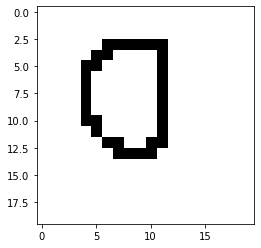

In [125]:
result=predict(img_r,all_theta)
print('预测结果是:{}')
print(0)
plt.imshow(img,cmap='gray')

 # 虽然最后没能成功预测但是也是学到了如何读入照片

# 下   面是神经网络初探

In [128]:
weight=loadmat('./ex3weights.mat')

In [133]:
weight

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 18 14:57:02 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Theta1': array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
         -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
        [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
         -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
        [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
         -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
        ...,
        [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...,
          2.35311186e-05, -3.25484493e-06,  9.02499060e-09],
        [-7.02096331e-01,  3.05178374e-10,  2.56061008e-09, ...,
         -8.61759744e-04,  9.43449909e-05,  3.83761998e-09],
        [-3.50933229e-01,  8.85876862e-09, -6.57515140e-10, ...,
         -1.80365926e-06, -8.14464807e-06,  8.79454531e-09]]),
 'Theta2': array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.057781

In [135]:
theta1=weight['Theta1']

In [136]:
theta2=weight["Theta2"]

In [163]:
theta1.shape

(25, 401)

In [139]:
theta2.shape

(10, 26)

In [ ]:
#证明隐藏节点参数都给搞好了

大概就是由一层到另一层的那些比重按照矩阵形式进行存储，

In [143]:
X0=data['X']

In [145]:
X0=np.insert(X0,0,1,1)

In [162]:
X0.shape

(5000, 401)

In [150]:
z2=np.matmul(X0,theta1.T)

In [151]:
a2=sigmoid(z2)

In [153]:
a2=np.insert(a2,0,1,1)

In [154]:
z3=np.matmul(a2,theta2.T)

In [155]:
a3=sigmoid(z3)

In [159]:
np.argmax(a3,1)+1

array([10, 10, 10, ...,  9,  9,  9], dtype=int64)

In [161]:
y_pred=np.argmax(a3,1)+1
print(classification_report(data['y'], y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       500
           2       0.98      0.97      0.98       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.97      0.98      0.98       500
           6       0.98      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

